In [33]:
import os
import requests
import zipfile

# Download do arquivo e salvar em pasta

In [34]:
url = 'https://github.com/ProfLeandroLessa/classroom-datasets/raw/master/CDMF/TP/dados_pesquisa_preferencias.zip'
 
response = requests.get(url)

diretorio_destino = 'C:\dados_pesquisa'
if response.status_code == requests.codes.OK:
        nome_arquivo_zip = url.split('/')[-1]
        caminho_arquivo_zip = os.path.join(diretorio_destino, nome_arquivo_zip)


In [35]:
with open(caminho_arquivo_zip, 'wb') as arquivo:
            arquivo.write(response.content)
            print("Donwload finalizado. Salvo em: {}".format(caminho_arquivo_zip))


Donwload finalizado. Salvo em: C:\dados_pesquisa\dados_pesquisa_preferencias.zip


In [38]:
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(diretorio_destino)
 
print(f"Arquivo ZIP descompactado em: {diretorio_destino}")

Arquivo ZIP descompactado em: C:\dados_pesquisa


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importação dos arquivos CVS

In [40]:
diretorio_arquivo = r'C:\dados_pesquisa\dados_pesquisa_preferencias.csv'
df = pd.read_csv(diretorio_arquivo, sep='|')


In [41]:
diretorio_arquivo = r'C:\dados_pesquisa\estado_regiao1.csv'
df2 = pd.read_csv(diretorio_arquivo, sep='|', encoding='ISO-8859-1')

In [42]:
df.shape

(2158, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cod_pessoa        2158 non-null   int64 
 1   data_coleta       2158 non-null   object
 2   genero            2158 non-null   object
 3   data_nascimento   2158 non-null   object
 4   animal_estimacao  2158 non-null   object
 5   clima             2147 non-null   object
 6   bebida_favorita   2158 non-null   object
 7   hobbies           2137 non-null   object
 8   cod_estado        2158 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 151.9+ KB


In [46]:
df.describe()

,cod_pessoa,cod_estado
count,2.158000e+03,2158.000000
mean,1.014257e+07,13.946247
std,6.140054e+02,7.813892
min,1.014150e+07,1.000000
25%,1.014204e+07,7.000000
50%,1.014257e+07,14.000000
75%,1.014310e+07,21.000000
max,1.014363e+07,27.000000


In [47]:
df2.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


# Verificando se há dados duplicados

In [48]:
df[df.duplicated()].count()

cod_pessoa          31
data_coleta         31
genero              31
data_nascimento     31
animal_estimacao    31
clima               31
bebida_favorita     31
hobbies             31
cod_estado          31
dtype: int64

In [ ]:
# Eliminando dados duplicados

In [49]:
df.drop_duplicates(inplace=True)

# Verificando a consistência da alteração

In [50]:
df2[df2.duplicated()].count()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

In [51]:
df[df.duplicated()].count()

cod_pessoa          0
data_coleta         0
genero              0
data_nascimento     0
animal_estimacao    0
clima               0
bebida_favorita     0
hobbies             0
cod_estado          0
dtype: int64

# Verificando se há registros nulos

In [52]:
df.isnull().sum()

cod_pessoa           0
data_coleta          0
genero               0
data_nascimento      0
animal_estimacao     0
clima               11
bebida_favorita      0
hobbies             21
cod_estado           0
dtype: int64

In [53]:
df2.isnull().sum()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

# Tratando dados nulos utilizando a técnica moda(usar o valor mais frequente da categoria)

In [54]:
moda = df['hobbies'].mode()[0]
df['hobbies'].fillna(moda, inplace=True)

C:\Users\lorai\AppData\Local\Temp\ipykernel_23136\1415602003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hobbies'].fillna(moda, inplace=True)


In [55]:
df.isnull().sum()

cod_pessoa           0
data_coleta          0
genero               0
data_nascimento      0
animal_estimacao     0
clima               11
bebida_favorita      0
hobbies              0
cod_estado           0
dtype: int64

In [56]:
dados_ausentes = df['clima'].isnull()
dados_ausentes_df = df[dados_ausentes]
# Exibir os dados ausentes
print("Linhas com dados ausentes na coluna 'clima':")
print(dados_ausentes_df)

Linhas com dados ausentes na coluna 'clima':
     cod_pessoa data_coleta     genero data_nascimento animal_estimacao clima  \
313    10143048  2020-02-22  Masculino      1977-07-05         cachorro   NaN   
318    10142282  2020-02-23  Masculino      1962-04-22             gato   NaN   
327    10141913  2020-02-25   Feminino      1996-02-07             gato   NaN   
328    10142780  2020-02-25  Masculino      1985-02-16         cachorro   NaN   
329    10142848  2020-02-25  Masculino      1957-02-02             gato   NaN   
407    10142264  2020-03-09  Masculino      1962-08-20        tartaruga   NaN   
413    10142050  2020-03-10  Masculino      1950-11-20         cachorro   NaN   
414    10142465  2020-03-10  Masculino      1998-10-15            peixe   NaN   
420    10143457  2020-03-10   Feminino      1963-05-27         cachorro   NaN   
423    10142424  2020-03-11  Masculino      1974-05-28             gato   NaN   
428    10141730  2020-03-13   Feminino      1999-12-12        ta

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 0 to 2157
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cod_pessoa        2127 non-null   int64 
 1   data_coleta       2127 non-null   object
 2   genero            2127 non-null   object
 3   data_nascimento   2127 non-null   object
 4   animal_estimacao  2127 non-null   object
 5   clima             2116 non-null   object
 6   bebida_favorita   2127 non-null   object
 7   hobbies           2127 non-null   object
 8   cod_estado        2127 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 166.2+ KB


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [59]:
moda = df['clima'].mode()[0]
df['clima'].fillna(moda, inplace=True)

C:\Users\lorai\AppData\Local\Temp\ipykernel_23136\878020351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clima'].fillna(moda, inplace=True)


In [60]:
df.isnull().sum()

cod_pessoa          0
data_coleta         0
genero              0
data_nascimento     0
animal_estimacao    0
clima               0
bebida_favorita     0
hobbies             0
cod_estado          0
dtype: int64

In [61]:
df.describe()

,cod_pessoa,cod_estado
count,2.127000e+03,2127.000000
mean,1.014256e+07,13.949224
std,6.141563e+02,7.818211
min,1.014150e+07,1.000000
25%,1.014203e+07,7.000000
50%,1.014256e+07,14.000000
75%,1.014310e+07,21.000000
max,1.014363e+07,27.000000


In [62]:
import pandas as pd
from datetime import datetime

In [63]:
# Aplicando a conversão na variável DataNascimento
df['data_nascimento'] = df['data_nascimento'].astype('datetime64[ns]')

In [64]:
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'])

# Calcule a diferença entre a data atual e a 'data_nascimento' em anos
data_atual = datetime.now()
df['idade'] = (data_atual - df['data_nascimento']).dt.days // 365


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 0 to 2157
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cod_pessoa        2127 non-null   int64         
 1   data_coleta       2127 non-null   object        
 2   genero            2127 non-null   object        
 3   data_nascimento   2127 non-null   datetime64[ns]
 4   animal_estimacao  2127 non-null   object        
 5   clima             2127 non-null   object        
 6   bebida_favorita   2127 non-null   object        
 7   hobbies           2127 non-null   object        
 8   cod_estado        2127 non-null   int64         
 9   idade             2127 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 182.8+ KB


In [66]:
df.head()

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies,cod_estado,idade
0,10141743,2020-01-01,Masculino,1981-04-25,peixe,frio,Cerveja,Praticar esporte,12,42
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV,12,58
2,10142548,2020-01-01,Masculino,1973-08-02,tartaruga,frio,Café,Ler livros,11,50
3,10142591,2020-01-01,Masculino,1997-03-05,gato,moderado,Cerveja,Aprender algo novo,14,26
4,10142654,2020-01-01,Feminino,1969-08-05,tartaruga,moderado,Café,Assistir TV,5,54


In [67]:
df.describe()

,cod_pessoa,data_nascimento,cod_estado,idade
count,2.127000e+03,2127,2127.000000,2127.000000
mean,1.014256e+07,1975-02-08 03:27:09.901269408,13.949224,48.559473
min,1.014150e+07,1950-01-02 00:00:00,1.000000,24.000000
25%,1.014203e+07,1962-12-13 00:00:00,7.000000,36.000000
50%,1.014256e+07,1975-01-05 00:00:00,14.000000,49.000000
75%,1.014310e+07,1987-12-04 00:00:00,21.000000,61.000000
max,1.014363e+07,1999-12-17 00:00:00,27.000000,74.000000
std,6.141563e+02,NaN,7.818211,14.462854


In [69]:
# Supondo que você tenha dois DataFrames chamados df1 e df2 e que ambos tenham uma coluna 'campo_em_comum'
# Substitua 'df1' e 'df2' pelos nomes reais dos seus DataFrames, se necessário

df_resultado = pd.merge(df, df2, left_on='cod_estado', right_on='id_estado', how='inner')


In [70]:
df_resultado.head()

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies,cod_estado,idade,id_estado,sigla,estado,regiao,pais
0,10141743,2020-01-01,Masculino,1981-04-25,peixe,frio,Cerveja,Praticar esporte,12,42,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV,12,58,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
2,10142548,2020-01-01,Masculino,1973-08-02,tartaruga,frio,Café,Ler livros,11,50,11,MT,Mato Grosso,Centro-Oeste,Brasil
3,10142591,2020-01-01,Masculino,1997-03-05,gato,moderado,Cerveja,Aprender algo novo,14,26,14,PA,Pará,Norte,Brasil
4,10142654,2020-01-01,Feminino,1969-08-05,tartaruga,moderado,Café,Assistir TV,5,54,5,BA,Bahia,Nordeste,Brasil


In [71]:
pd.DataFrame(df_resultado.groupby(['regiao'])['idade'].mean())

,idade
regiao,
Centro-Oeste,49.632399
Nordeste,48.623022
Norte,48.053265
Sudeste,48.000000
Sul,48.957346


<Axes: title={'center': 'Grafico BOXPLOT'}, xlabel='idade', ylabel='animal_estimacao'>

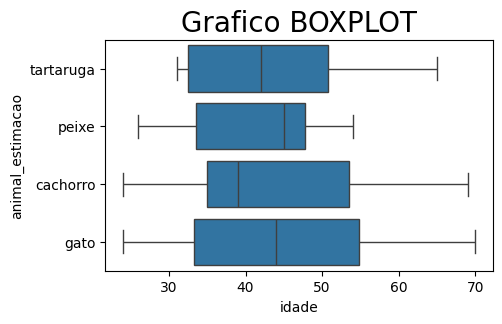

In [72]:
plt.figure(figsize=(5,3))
plt.title('Grafico BOXPLOT', size=20)
sns.boxplot(data=df_resultado.query('genero == "Masculino" and estado == "Minas Gerais"'), 
             x='idade', 
             y='animal_estimacao'
             )



# Animal de maior preferencia entre as mulheres

In [73]:
pd.crosstab(df['animal_estimacao'], df['genero'])

genero,Feminino,Masculino
animal_estimacao,,
cachorro,143,271
gato,279,585
peixe,158,274
tartaruga,149,268


# Qual é a quantidade de pessoas presentes no estado de Minas Gerais e que gostam de chá?

In [74]:
df_resultado.query('estado == "Minas Gerais" and bebida_favorita == "Chá"').count()

cod_pessoa          17
data_coleta         17
genero              17
data_nascimento     17
animal_estimacao    17
clima               17
bebida_favorita     17
hobbies             17
cod_estado          17
idade               17
id_estado           17
sigla               17
estado              17
regiao              17
pais                17
dtype: int64

# histograma

<Axes: title={'center': 'Histograma'}, xlabel='idade', ylabel='Count'>

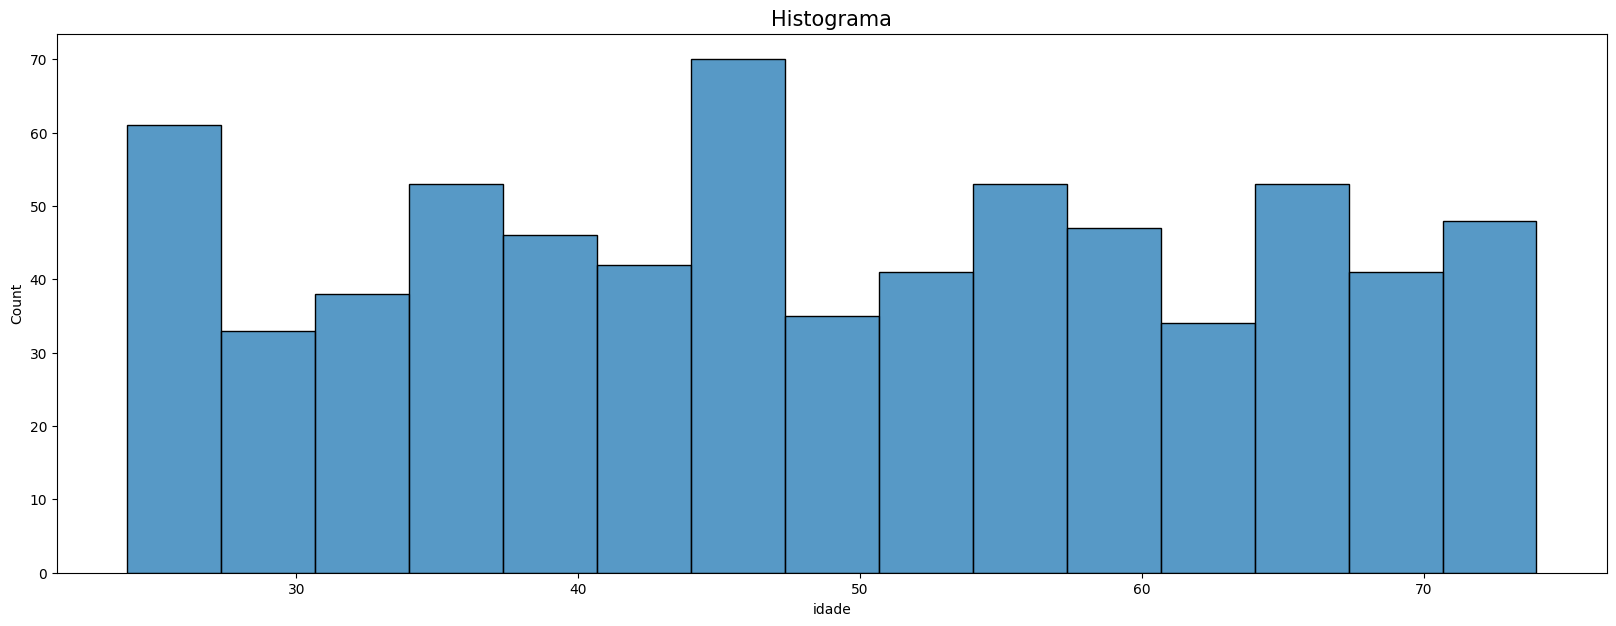

In [75]:
plt.figure(figsize=(20,7))
plt.title('Histograma', size=15)
sns.histplot(data=df_resultado.query('regiao == "Nordeste"'), x='idade', bins=15)

In [ ]:
# hobbies entre as mulheres

In [86]:
df_resultado.query('genero == "Feminino"')['hobbies'].value_counts()

hobbies
Dormir                104
Escutar música        103
Escrever               94
Praticar esporte       93
Pintar quadros         89
Aprender algo novo     88
Ler livros             80
Assistir TV            78
Name: count, dtype: int64

# Qual estado possui o maior número de participantes na pesquisa?

In [85]:
df_resultado['estado'].value_counts()

estado
Mato Grosso do Sul     97
Sergipe                97
Pará                   97
Amapá                  95
Rondônia               89
Espírito Santo         87
São Paulo              86
Mato Grosso            84
Paraíba                83
Maranhão               83
Amazonas               81
Rio Grande do Sul      80
Ceará                  80
Distrito Federal       79
Piauí                  78
Rio de Janeiro         78
Alagoas                78
Tocantins              75
Roraima                73
Acre                   72
Bahia                  70
Pernambuco             69
Paraná                 68
Minas Gerais           67
Santa Catarina         63
Goiás                  61
Rio Grande do Norte    57
Name: count, dtype: int64

# qual a bebida favorita na região Sul

In [89]:
df_resultado.query('regiao == "Sul"')['bebida_favorita'].value_counts()

bebida_favorita
Chá             44
Cerveja         37
Café            37
refrigerante    33
Água            32
Vinho           28
Name: count, dtype: int64

# Quantas pessoas têm preferência para o clima frio?


In [87]:
df_resultado.query('clima == "frio" ').count()

cod_pessoa          728
data_coleta         728
genero              728
data_nascimento     728
animal_estimacao    728
clima               728
bebida_favorita     728
hobbies             728
cod_estado          728
idade               728
id_estado           728
sigla               728
estado              728
regiao              728
pais                728
dtype: int64